# Import Statements

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics, preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [60]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [61]:
from xgboost.sklearn import XGBClassifier

In [62]:
data = pd.read_csv("../input/data.csv")

# Info given on data - 

#### Attribute Information:

    - column 1 : ID number
    - column 2 : Diagnosis (M = malignant, B = benign)
    - column 3-32 : Ten real-valued features are computed for each cell nucleus:

        a) radius (mean of distances from center to points on the perimeter)
        b) texture (standard deviation of gray-scale values)
        c) perimeter
        d) area
        e) smoothness (local variation in radius lengths)
        f) compactness (perimeter^2 / area - 1.0)
        g) concavity (severity of concave portions of the contour)
        h) concave points (number of concave portions of the contour)
        i) symmetry
        j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

In [63]:
data.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
350,899187,B,11.66,17.07,73.70,421.0,0.07561,0.03630,0.008306,0.01162,0.1671,0.05731,0.3534,0.6724,2.2250,26.03,0.006583,0.006991,0.005949,0.006296,0.02216,0.002668,13.28,19.74,83.61,542.5,0.09958,0.06476,0.03046,0.04262,0.2731,0.06825,NaN
11,84610002,M,15.78,17.89,103.60,781.0,0.09710,0.12920,0.099540,0.06606,0.1842,0.06082,0.5058,0.9849,3.5640,54.16,0.005771,0.040610,0.027910,0.012820,0.02008,0.004144,20.42,27.28,136.50,1299.0,0.13960,0.56090,0.39650,0.18100,0.3792,0.10480,NaN
466,9113455,B,13.14,20.74,85.98,536.9,0.08675,0.10890,0.108500,0.03510,0.1562,0.06020,0.3152,0.7884,2.3120,27.40,0.007295,0.031790,0.046150,0.012540,0.01561,0.003230,14.80,25.46,100.90,689.1,0.13510,0.35490,0.45040,0.11810,0.2563,0.08174,NaN
34,854039,M,16.13,17.88,107.00,807.2,0.10400,0.15590,0.135400,0.07752,0.1998,0.06515,0.3340,0.6857,2.1830,35.03,0.004185,0.028680,0.026640,0.009067,0.01703,0.003817,20.21,27.26,132.70,1261.0,0.14460,0.58040,0.52740,0.18640,0.4270,0.12330,NaN
458,9112594,B,13.00,25.13,82.61,520.2,0.08369,0.05073,0.012060,0.01762,0.1667,0.05449,0.2621,1.2320,1.6570,21.19,0.006054,0.008974,0.005681,0.006336,0.01215,0.001514,14.34,31.88,91.06,628.5,0.12180,0.10930,0.04462,0.05921,0.2306,0.06291,NaN
507,91544002,B,11.06,17.12,71.25,366.5,0.11940,0.10710,0.040630,0.04268,0.1954,0.07976,0.1779,1.0300,1.3180,12.30,0.012620,0.023480,0.018000,0.012850,0.02220,0.008313,11.69,20.74,76.08,411.1,0.16620,0.20310,0.12560,0.09514,0.2780,0.11680,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.351400,0.15200,0.2397,0.07016,0.7260,1.5950,5.7720,86.22,0.006522,0.061580,0.071170,0.016640,0.02324,0.006185,25.74,39.42,184.60,1821.0,0.16500,0.86810,0.93870,0.26500,0.4087,0.12400,NaN
506,91544001,B,12.22,20.04,79.47,453.1,0.10960,0.11520,0.081750,0.02166,0.2124,0.06894,0.1811,0.7959,0.9857,12.58,0.006272,0.021980,0.039660,0.009894,0.01320,0.003813,13.16,24.17,85.13,515.3,0.14020,0.23150,0.35350,0.08088,0.2709,0.08839,NaN
74,8610175,B,12.31,16.52,79.19,470.9,0.09172,0.06829,0.033720,0.02272,0.1720,0.05914,0.2505,1.0250,1.7400,19.68,0.004854,0.018190,0.018260,0.007965,0.01386,0.002304,14.11,23.21,89.71,611.1,0.11760,0.18430,0.17030,0.08660,0.2618,0.07609,NaN
153,87106,B,11.15,13.08,70.87,381.9,0.09754,0.05113,0.019820,0.01786,0.1830,0.06105,0.2251,0.7815,1.4290,15.48,0.009019,0.008985,0.011960,0.008232,0.02388,0.001619,11.99,16.30,76.25,440.8,0.13410,0.08971,0.07116,0.05506,0.2859,0.06772,NaN


###### Looking at the sample dataset, we can  infer -

1. Result is the **diagnosis** column. It should be used as labels.
2. Columns **id**, **Unnamed: 32** don't have any significance in the dataset.
3. The other columns left can be used as features.

In [64]:
del data['id']
del data['Unnamed: 32']

In [65]:
data.sample(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
465,B,13.24,20.13,86.87,542.9,0.08284,0.12230,0.10100,0.02833,0.1601,0.06432,0.2810,0.8135,3.369,23.81,0.004929,0.06657,0.07683,0.013680,0.01526,0.008133,15.44,25.50,115.00,733.5,0.12010,0.56460,0.65560,0.13570,0.2845,0.12490
500,B,15.04,16.74,98.73,689.4,0.09883,0.13640,0.07721,0.06142,0.1668,0.06869,0.3720,0.8423,2.304,34.84,0.004123,0.01819,0.01996,0.010040,0.01055,0.003237,16.76,20.43,109.70,856.9,0.11350,0.21760,0.18560,0.10180,0.2177,0.08549
191,B,12.77,21.41,82.02,507.4,0.08749,0.06601,0.03112,0.02864,0.1694,0.06287,0.7311,1.7480,5.118,53.65,0.004571,0.01790,0.02176,0.017570,0.03373,0.005875,13.75,23.50,89.04,579.5,0.09388,0.08978,0.05186,0.04773,0.2179,0.06871
221,B,13.56,13.90,88.59,561.3,0.10510,0.11920,0.07860,0.04451,0.1962,0.06303,0.2569,0.4981,2.011,21.03,0.005851,0.02314,0.02544,0.008360,0.01842,0.002918,14.98,17.13,101.10,686.6,0.13760,0.26980,0.25770,0.09090,0.3065,0.08177
134,M,18.45,21.91,120.20,1075.0,0.09430,0.09709,0.11530,0.06847,0.1692,0.05727,0.5959,1.2020,3.766,68.35,0.006001,0.01422,0.02855,0.009148,0.01492,0.002205,22.52,31.39,145.60,1590.0,0.14650,0.22750,0.39650,0.13790,0.3109,0.07610
444,M,18.03,16.85,117.50,990.0,0.08947,0.12320,0.10900,0.06254,0.1720,0.05780,0.2986,0.5906,1.921,35.77,0.004117,0.01560,0.02975,0.009753,0.01295,0.002436,20.38,22.02,133.30,1292.0,0.12630,0.26660,0.42900,0.15350,0.2842,0.08225
49,B,13.49,22.30,86.91,561.0,0.08752,0.07698,0.04751,0.03384,0.1809,0.05718,0.2338,1.3530,1.735,20.20,0.004455,0.01382,0.02095,0.011840,0.01641,0.001956,15.15,31.82,99.00,698.8,0.11620,0.17110,0.22820,0.12820,0.2871,0.06917
369,M,22.01,21.90,147.20,1482.0,0.10630,0.19540,0.24480,0.15010,0.1824,0.06140,1.0080,0.6999,7.561,130.20,0.003978,0.02821,0.03576,0.014710,0.01518,0.003796,27.66,25.80,195.00,2227.0,0.12940,0.38850,0.47560,0.24320,0.2741,0.08574
461,M,27.42,26.27,186.90,2501.0,0.10840,0.19880,0.36350,0.16890,0.2061,0.05623,2.5470,1.3060,18.650,542.20,0.007650,0.05374,0.08055,0.025980,0.01697,0.004558,36.04,31.37,251.20,4254.0,0.13570,0.42560,0.68330,0.26250,0.2641,0.07427
481,B,13.90,19.24,88.73,602.9,0.07991,0.05326,0.02995,0.02070,0.1579,0.05594,0.3316,0.9264,2.056,28.41,0.003704,0.01082,0.01530,0.006275,0.01062,0.002217,16.41,26.42,104.40,830.5,0.10640,0.14150,0.16730,0.08150,0.2356,0.07603


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

*Except for diagnosis column, every column is float64. Let's convert diagnosis too.*

In [67]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [68]:
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

In [69]:
data.sample(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
556,0,10.16,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.011160,0.1791,0.06331,0.2441,2.0900,1.648,16.80,0.012910,0.02222,0.004174,0.007082,0.02572,0.002278,10.65,22.88,67.88,347.3,0.12650,0.12000,0.01005,0.02232,0.2262,0.06742
442,0,13.78,15.79,88.37,585.9,0.08817,0.06718,0.010550,0.009937,0.1405,0.05848,0.3563,0.4833,2.235,29.34,0.006432,0.01156,0.007741,0.005657,0.01227,0.002564,15.27,17.50,97.90,706.6,0.10720,0.10710,0.03517,0.03312,0.1859,0.06810
501,1,13.82,24.49,92.33,595.9,0.11620,0.16810,0.135700,0.067590,0.2275,0.07237,0.4751,1.5280,2.974,39.05,0.009680,0.03856,0.034760,0.016160,0.02434,0.006995,16.01,32.94,106.00,788.0,0.17940,0.39660,0.33810,0.15210,0.3651,0.11830
398,0,11.06,14.83,70.31,378.2,0.07741,0.04768,0.027120,0.007246,0.1535,0.06214,0.1855,0.6881,1.263,12.98,0.004259,0.01469,0.019400,0.004168,0.01191,0.003537,12.68,20.35,80.79,496.7,0.11200,0.18790,0.20790,0.05556,0.2590,0.09158
293,0,11.85,17.46,75.54,432.7,0.08372,0.05642,0.026880,0.022800,0.1875,0.05715,0.2070,1.2380,1.234,13.88,0.007595,0.01500,0.014120,0.008578,0.01792,0.001784,13.06,25.75,84.35,517.8,0.13690,0.17580,0.13160,0.09140,0.3101,0.07007
443,0,10.57,18.32,66.82,340.9,0.08142,0.04462,0.019930,0.011110,0.2372,0.05768,0.1818,2.5420,1.277,13.12,0.010720,0.01331,0.019930,0.011110,0.01717,0.004492,10.94,23.31,69.35,366.3,0.09794,0.06542,0.03986,0.02222,0.2699,0.06736
49,0,13.49,22.30,86.91,561.0,0.08752,0.07698,0.047510,0.033840,0.1809,0.05718,0.2338,1.3530,1.735,20.20,0.004455,0.01382,0.020950,0.011840,0.01641,0.001956,15.15,31.82,99.00,698.8,0.11620,0.17110,0.22820,0.12820,0.2871,0.06917
377,0,13.46,28.21,85.89,562.1,0.07517,0.04726,0.012710,0.011170,0.1421,0.05763,0.1689,1.1500,1.400,14.91,0.004942,0.01203,0.007508,0.005179,0.01442,0.001684,14.69,35.63,97.11,680.6,0.11080,0.14570,0.07934,0.05781,0.2694,0.07061
280,1,19.16,26.60,126.20,1138.0,0.10200,0.14530,0.192100,0.096640,0.1902,0.06220,0.6361,1.0010,4.321,69.65,0.007392,0.02449,0.039880,0.012930,0.01435,0.003446,23.72,35.90,159.80,1724.0,0.17820,0.38410,0.57540,0.18720,0.3258,0.09720
338,0,10.05,17.53,64.41,310.8,0.10070,0.07326,0.025110,0.017750,0.1890,0.06331,0.2619,2.0150,1.778,16.85,0.007803,0.01449,0.016900,0.008043,0.02100,0.002778,11.16,26.84,71.98,384.0,0.14020,0.14020,0.10550,0.06499,0.2894,0.07664


## Frequency of different diagnosis

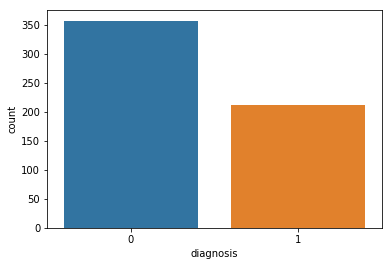

In [70]:
sns.countplot(data.diagnosis, label='Count')

# Further exploration in the feature set

So we know that there are 10 attributes for which **mean**, **standard error (se)**, **worst** have been calculated. These become the features. <br>
Therefore, **10 x 3 = 30 Features**!

Let's divide the attributes into groups.

In [71]:
print(list(data.columns))

['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [72]:
features_mean = list(data.columns[1:11])
features_se = list(data.columns[11:21])
features_worst =list(data.columns[21:31])
print("---------------- features_mean -------------------------------------------------------")
print(features_mean)
print("\n---------------- features_se (Standard Error) -------------------------------------------------------")
print(features_se)
print("\n---------------- features_worst --------------------------------------------------------")
print(features_worst)

---------------- features_mean -------------------------------------------------------
['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

---------------- features_se (Standard Error) -------------------------------------------------------
['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se']

---------------- features_worst --------------------------------------------------------
['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


# Feature Selection

Using a correlation graph to see if we can remove any columns from the feature set.

In [73]:
corr = data[features_mean].corr().abs()
lower_right_ones = np.tril(np.ones(corr.shape, dtype='bool'), k=-1)
correlations = corr.where(lower_right_ones)
correlations

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
radius_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
texture_mean,0.323782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
perimeter_mean,0.997855,0.329533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
area_mean,0.987357,0.321086,0.986507,NaN,NaN,NaN,NaN,NaN,NaN,NaN
smoothness_mean,0.170581,0.023389,0.207278,0.177028,NaN,NaN,NaN,NaN,NaN,NaN
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,NaN,NaN,NaN,NaN,NaN
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,NaN,NaN,NaN,NaN
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,NaN,NaN,NaN
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,NaN,NaN
fractal_dimension_mean,0.311631,0.076437,0.261477,0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,NaN


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 <a list of 10 Text xticklabel objects>)

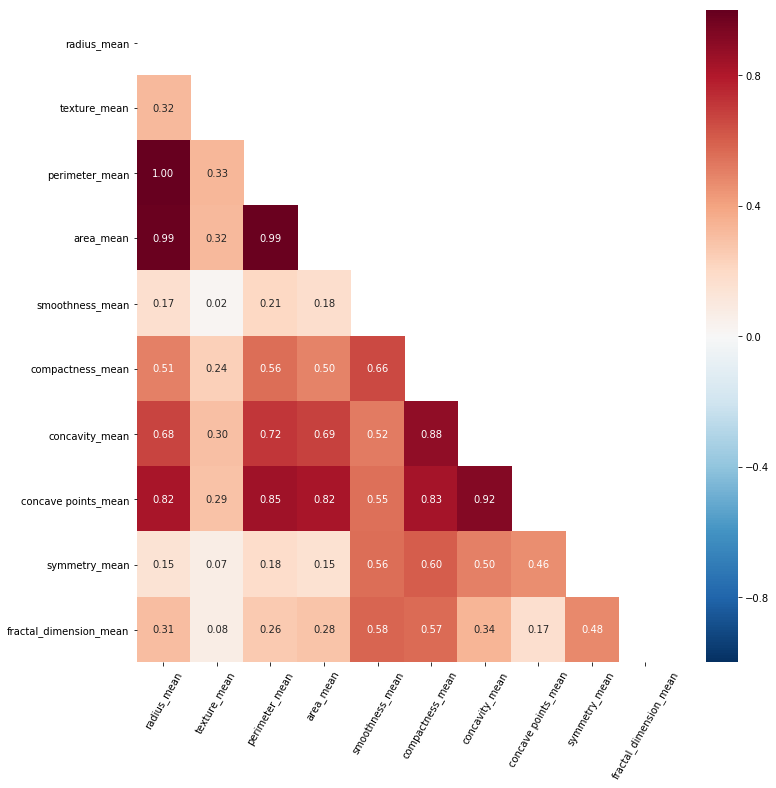

In [74]:
plt.figure(figsize=(12,12))
sns.heatmap(correlations, annot=True, cmap='RdBu_r', fmt= '.2f', vmax=1, vmin=-1)
plt.xticks(rotation=60)

In [75]:
THRESHOLD_VALUE = 0.85
list(i for i in (correlations[correlations.gt(THRESHOLD_VALUE)].stack().index) if i[0] is not i[1])

[('perimeter_mean', 'radius_mean'),
 ('area_mean', 'radius_mean'),
 ('area_mean', 'perimeter_mean'),
 ('concavity_mean', 'compactness_mean'),
 ('concave points_mean', 'perimeter_mean'),
 ('concave points_mean', 'concavity_mean')]

In [76]:
correlations[correlations.gt(THRESHOLD_VALUE)].stack().sort_values(ascending = False)

perimeter_mean       radius_mean         0.997855
area_mean            radius_mean         0.987357
                     perimeter_mean      0.986507
concave points_mean  concavity_mean      0.921391
concavity_mean       compactness_mean    0.883121
concave points_mean  perimeter_mean      0.850977
dtype: float64

### We can conclude - 

 1. **radius_mean**, **perimeter_mean** and **area_mean** are highly correlated. Hence, we will use **radius_mean** only.
 2. **concavity_mean**, **concave points_mean** and **compactness_mean** are highly correlated. Hence, we will use **concavity_mean** only.

------------------------------------

Let's do the same for features_se, features_worst too.

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 <a list of 10 Text xticklabel objects>)

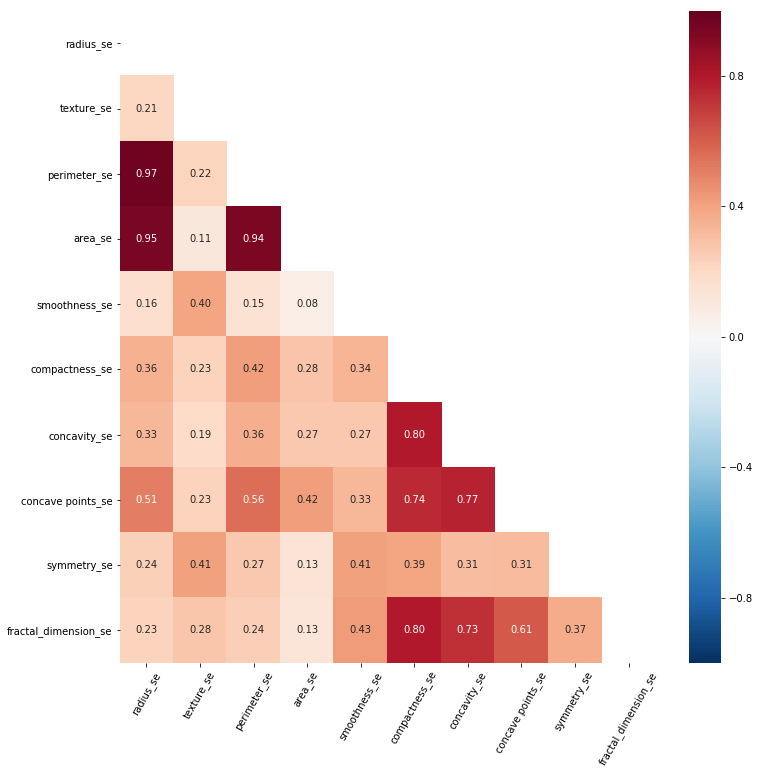

In [77]:
corr = data[features_se].corr().abs()
lower_right_ones = np.tril(np.ones(corr.shape, dtype='bool'), k=-1)
correlations = corr.where(lower_right_ones)
plt.figure(figsize=(12,12))
sns.heatmap(correlations, annot=True, cmap='RdBu_r', fmt= '.2f', vmax=1, vmin=-1)
plt.xticks(rotation=60)

In [78]:
THRESHOLD_VALUE = 0.85
correlations[correlations.gt(THRESHOLD_VALUE)].stack().sort_values(ascending = False)

perimeter_se  radius_se       0.972794
area_se       radius_se       0.951830
              perimeter_se    0.937655
dtype: float64

### We can conclude - 

 1. **radius_se**, **perimeter_se** and **area_se** are highly correlated. Hence, we will use **radius_se** only.

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 <a list of 10 Text xticklabel objects>)

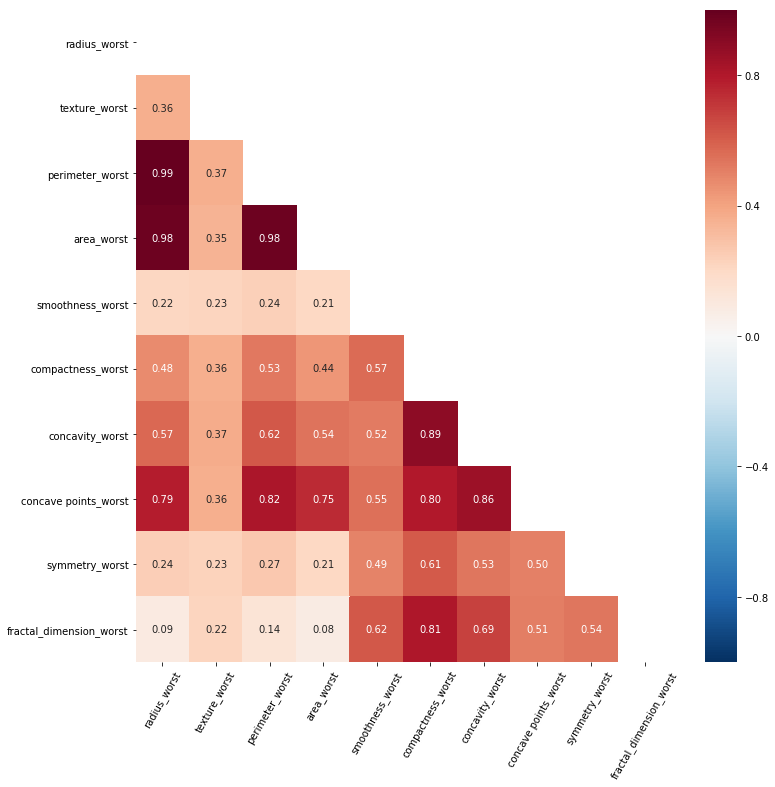

In [79]:
corr = data[features_worst].corr().abs()
lower_right_ones = np.tril(np.ones(corr.shape, dtype='bool'), k=-1)
correlations = corr.where(lower_right_ones)
plt.figure(figsize=(12,12))
sns.heatmap(correlations, annot=True, cmap='RdBu_r', fmt= '.2f', vmax=1, vmin=-1)
plt.xticks(rotation=60)

In [80]:
THRESHOLD_VALUE = 0.85
correlations[correlations.gt(THRESHOLD_VALUE)].stack().sort_values(ascending = False)

perimeter_worst       radius_worst         0.993708
area_worst            radius_worst         0.984015
                      perimeter_worst      0.977578
concavity_worst       compactness_worst    0.892261
concave points_worst  concavity_worst      0.855434
dtype: float64

### We can conclude - 

 1. **radius_worst**, **perimeter_worst** and **area_worst** are highly correlated. Hence, we will use **radius_worst** only.
 2. **concavity_worst**, **concave points_worst** and **compactness_worst** are highly correlated. Hence, we will use **concavity_worst** only.

### Now we know what columns to use.

In [81]:
to_remove = [
    'concave points_meanr', 'compactness_mean', 'perimeter_mea', 'area_mean',
    'concave points_worst', 'compactness_worst', 'perimeter_worst', 'area_worst',
    'perimeter_se', 'area_se'
]
to_use = [e for e in data.columns if e not in to_remove]
print(to_use)

['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'smoothness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'smoothness_worst', 'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [82]:
reduced_data = data[to_use]
reduced_data.sample(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,smoothness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
440,0,10.97,17.20,71.73,0.08915,0.09457,0.03613,0.1489,0.06640,0.2574,1.3760,0.008565,0.046380,0.064300,0.017680,0.01516,0.004976,12.36,26.87,0.1391,0.47790,0.2540,0.09532
458,0,13.00,25.13,82.61,0.08369,0.01206,0.01762,0.1667,0.05449,0.2621,1.2320,0.006054,0.008974,0.005681,0.006336,0.01215,0.001514,14.34,31.88,0.1218,0.04462,0.2306,0.06291
271,0,11.29,13.04,72.23,0.09834,0.03265,0.02755,0.1769,0.06270,0.1904,0.5293,0.006472,0.011220,0.012820,0.008849,0.01692,0.002817,12.32,16.18,0.1358,0.12750,0.2733,0.08022
330,1,16.03,15.51,105.80,0.09491,0.12040,0.07041,0.1782,0.05976,0.3371,0.7476,0.005839,0.032450,0.037150,0.014590,0.01467,0.003121,18.76,21.98,0.1435,0.49560,0.3019,0.09124
224,0,13.27,17.02,84.55,0.08445,0.03554,0.02456,0.1496,0.05674,0.2927,0.8907,0.006032,0.011040,0.022590,0.009057,0.01482,0.002496,15.14,23.60,0.1276,0.17860,0.2506,0.07623
75,1,16.07,19.65,104.10,0.09168,0.09769,0.06638,0.1798,0.05391,0.7474,1.0160,0.010820,0.022030,0.035000,0.018090,0.01550,0.001948,19.77,24.56,0.1500,0.28290,0.2650,0.06387
294,0,12.72,13.78,81.78,0.09667,0.01288,0.01924,0.1638,0.06100,0.1807,0.6931,0.006064,0.011800,0.006564,0.007978,0.01374,0.001392,13.50,17.48,0.1298,0.05233,0.2369,0.06922
302,1,20.09,23.86,134.70,0.10800,0.22830,0.12800,0.2249,0.07469,1.0720,1.7430,0.007964,0.047320,0.076490,0.019360,0.02736,0.005928,23.68,29.43,0.1347,0.49320,0.3294,0.09469
212,1,28.11,18.47,188.50,0.11420,0.32010,0.15950,0.1648,0.05525,2.8730,1.4760,0.013450,0.027720,0.063890,0.014070,0.04783,0.004476,28.11,18.47,0.1142,0.32010,0.1648,0.05525
385,1,14.60,23.29,93.97,0.08682,0.08390,0.05271,0.1627,0.05416,0.4157,1.6270,0.008312,0.017420,0.033890,0.015760,0.01740,0.002871,15.79,31.71,0.1312,0.26750,0.2477,0.06836


# Data Transformation

In [83]:
X = reduced_data.loc[:, 'radius_mean': 'fractal_dimension_worst']
Y = reduced_data['diagnosis']

In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle=True)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((426, 22), (143, 22), (426,), (143,))

In [85]:
sc = preprocessing.StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [86]:
pca = PCA(.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Using Models

In [87]:
svc = SVC()
gaussian_nb = GaussianNB()
decision_tree_classifier = DecisionTreeClassifier()
random_forest_classifier = RandomForestClassifier()
logistic_regression = LogisticRegression()
k_neighbors_classifier = KNeighborsClassifier()

In [88]:
svc.fit(X_train,Y_train)
gaussian_nb.fit(X_train,Y_train)
decision_tree_classifier.fit(X_train,Y_train)
random_forest_classifier.fit(X_train,Y_train)
logistic_regression.fit(X_train,Y_train)
k_neighbors_classifier.fit(X_train,Y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [89]:
print("svc - {0:.3f}".format(svc.score(X_test, Y_test)))
print("gaussian_nb - {0:.3f}".format(gaussian_nb.score(X_test, Y_test)))
print("decision_tree_classifier - {0:.3f}".format(decision_tree_classifier.score(X_test, Y_test)))
print("random_forest_classifier - {0:.3f}".format(random_forest_classifier.score(X_test, Y_test)))
print("logistic_regression - {0:.3f}".format(logistic_regression.score(X_test, Y_test)))
print("k_neighbors_classifier - {0:.3f}".format(k_neighbors_classifier.score(X_test, Y_test)))


svc - 0.979
gaussian_nb - 0.944
decision_tree_classifier - 0.923
random_forest_classifier - 0.972
logistic_regression - 0.965
k_neighbors_classifier - 0.972
